In [42]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [43]:
 # Loading the data from csv into a dataframe
df= pd.read_csv('./Desktop/Docs-personal/Chegg/Data.csv', encoding = "ISO-8859-1")

In [ ]:
# priliminary testing and familiarization of the data
df.info()       #  lists all columns and datatype
df.head(10)     # to get the top 10 rows 

In [53]:
# Question 1:	Look at the summary statistics for your variables (max, min, mean, standard deviation).  How many observations do you have?  How many observations have data in every column?

print("Summary of variables in the data")
df.iloc[:,12:].agg([np.max,np.min,np.mean,np.std]) # filtering on columns starting from 13th column and getting their aggregate



Summary of variables in the data


,admission_rate.by_ope_id,sat_scores.midpoint.critical_reading,sat_scores.midpoint.math,sat_scores.midpoint.writing,sat_scores.average.by_ope_id,program_percentage.agriculture,program_percentage.resources,program_percentage.architecture,program_percentage.ethnic_cultural_gender,program_percentage.communication,...,program_percentage.mechanic_repair_technology,program_percentage.precision_production,program_percentage.transportation,program_percentage.visual_performing,program_percentage.health,program_percentage.business_marketing,program_percentage.history,size,tuition.in_state,tuition.out_of_state
amax,1.000000,760.000000,785.000000,755.000000,1534.000000,1.000000,0.564100,1.000000,0.692300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.184500,166816.000000,64900.000000,64900.000000
amin,0.000000,290.000000,310.000000,350.000000,666.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000
mean,0.690568,521.812452,530.771863,521.239596,1061.627694,0.003936,0.002663,0.001496,0.001270,0.011602,...,0.027680,0.009295,0.007270,0.033763,0.270298,0.096060,0.004472,2332.781523,13861.481087,16359.024786
std,0.203374,67.925198,71.641408,77.548001,129.988516,0.033695,0.016432,0.025274,0.012151,0.052585,...,0.116521,0.052719,0.066755,0.128781,0.349355,0.156117,0.012390,5442.696859,10614.221540,9869.967465


In [54]:
print("Count of non null observations")
df.iloc[:,12:].count() # getting the non null count of all columns starting from 13th

Count of non null observations


admission_rate.by_ope_id                                   2484
sat_scores.midpoint.critical_reading                       1301
sat_scores.midpoint.math                                   1315
sat_scores.midpoint.writing                                 793
sat_scores.average.by_ope_id                               1531
program_percentage.agriculture                             7086
program_percentage.resources                               7086
program_percentage.architecture                            7086
program_percentage.ethnic_cultural_gender                  7086
program_percentage.communication                           7086
program_percentage.communications_technology               7086
program_percentage.computer                                7086
program_percentage.personal_culinary                       7086
program_percentage.education                               7086
program_percentage.engineering                             7086
program_percentage.engineering_technolog

In [55]:
#Question 2- Investigate whether there are any duplicate schools in the data
# finding the repeated school names
print("Number of repeated schoolnames : ")
df[df.duplicated(['school_name'])]['school_name'].shape[0]


Number of repeated schoolnames : 


170

In [56]:
# Repeated school names might be in different location.Finding duplicate schools using name and zipcode
print("Duplicate Rows based on schoolname and zip code")
df[df.duplicated(['school_name','zip'])]


Duplicate Rows based on schoolname and zip code


,id,school_name,city,state,zip,accreditor,school_url,region_id,locale,carnegie_basic,...,program_percentage.mechanic_repair_technology,program_percentage.precision_production,program_percentage.transportation,program_percentage.visual_performing,program_percentage.health,program_percentage.business_marketing,program_percentage.history,size,tuition.in_state,tuition.out_of_state
7298,481669,Tulsa Welding School-Tulsa,Tulsa,OK,74104-3909,Accrediting Commission of Career Schools and C...,www.weldingschool.com,6,11.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,NaN,NaN


In [57]:
# Question 3:How many schools have "University" in their name?

print("Number of schools with University in their name : ",df[df['school_name'].str.contains('University')].shape[0])

Number of schools with University in their name :  1720


In [58]:
# 4.	How many schools are in each state?  How many in each region? 
print("Count of schools in each state: ")
df['state'].value_counts()

Count of schools in each state: 


CA    805
TX    482
NY    464
FL    436
PA    414
OH    365
IL    312
MO    214
MI    212
NC    210
MA    202
GA    201
TN    191
VA    188
NJ    168
IN    162
MN    162
PR    152
OK    149
AZ    138
CO    133
WA    127
LA    122
WI    119
SC    116
KY    116
KS    103
CT    103
MD    101
AL     97
OR     96
IA     93
AR     89
UT     85
WV     79
MS     65
NM     53
NE     50
NV     50
ME     44
ID     42
NH     42
MT     32
ND     31
SD     31
VT     29
HI     27
RI     26
DC     25
DE     19
AK     11
WY     11
GU      3
VI      2
MP      1
AS      1
FM      1
MH      1
PW      1
Name: state, dtype: int64

In [47]:
#Number of schools in each region? 
print("Count of schools in each Region: ")
df['region_id'].value_counts()


Count of schools in each Region: 


5    1910
2    1190
3    1170
8    1116
6     822
4     684
1     446
7     303
9     162
0       1
Name: region_id, dtype: int64

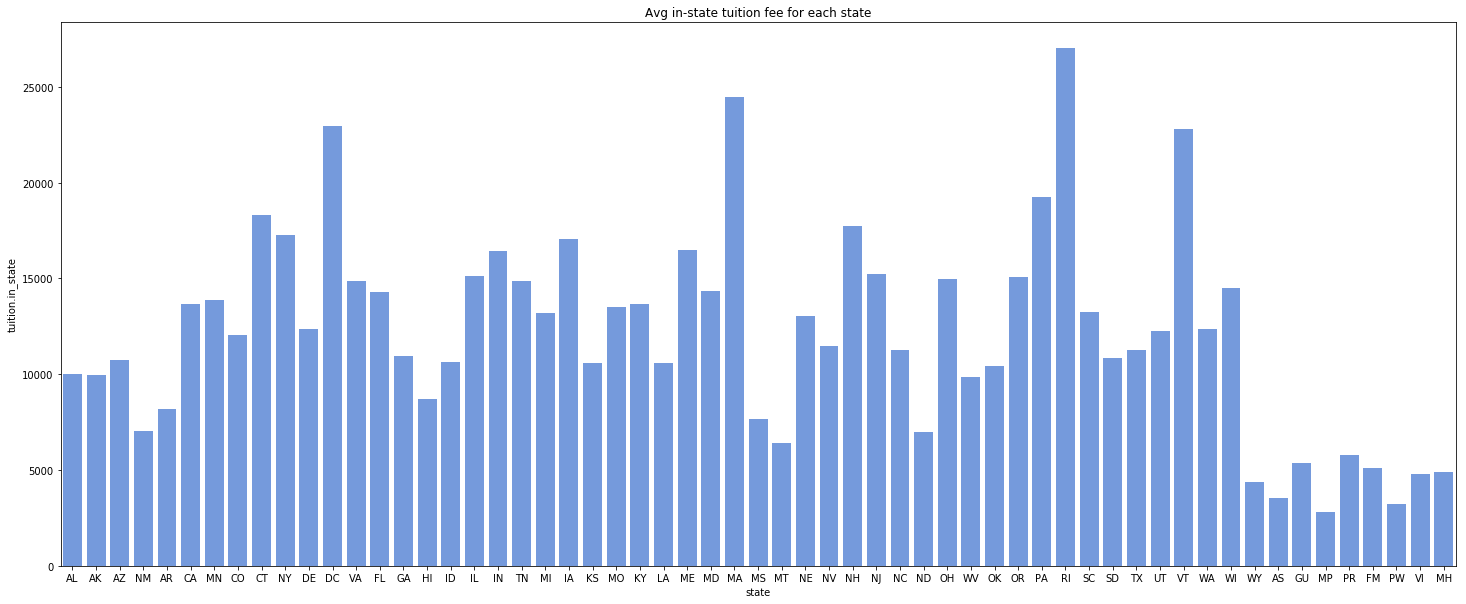

In [59]:
# Question 5.	What is the average in-state tuition by state Please make a graph for these results.
f, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Avg in-state tuition fee for each state')
sns.barplot(x=df['state'], y=df['tuition.in_state'], data=df,color="cornflowerblue" ,ax=ax, ci=None)

In [18]:
# getting a count of schools that have data for both in_state and  out_of_state tuition fee.
df[(df['tuition.in_state']>=0) &(df['tuition.out_of_state']>=0)].shape[0] 


4196

In [60]:
# getting a percent of schools where in_state and out_of_state tuition fee are the same.
df[df['tuition.in_state'] ==df['tuition.out_of_state']].shape[0] / df[(df['tuition.in_state']>=0) &(df['tuition.out_of_state']>=0)].shape[0] 


0.6277407054337464

In [14]:

# getting a number of schools where in_state is more than out_of_state tuition fee.
df[df['tuition.in_state'] >df['tuition.out_of_state']].shape[0]


1

In [17]:
# getting the percentage difference of instate and out of state.
df2 =df[(df['tuition.in_state']>=0) &(df['tuition.out_of_state']>=0)]
(df2['tuition.out_of_state'].sum() -df2['tuition.in_state'].sum())/df2['tuition.out_of_state'].sum() *100

15.370164138037696

In [61]:
# adding the column school group. Schools 1,2,3,5,6,9 are group as need assistance and the rest are grouped as other schools
df['School group'] = df['carnegie_undergrad'].apply(lambda x: 'Need Assistance' if x in [1,2,3,5,6,9] else 'Other schools')

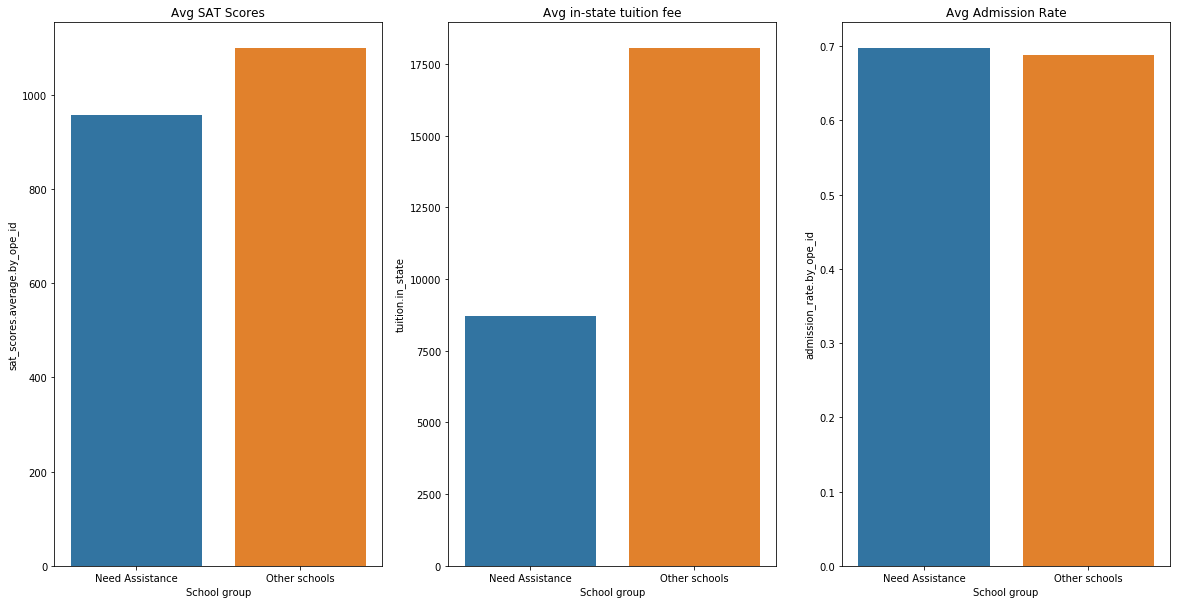

In [62]:
# comparing 'Need assistance' group with the other groups on SAT scores, admission rate and tuition fee
fig, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].set_title('Avg SAT Scores')
ax[1].set_title('Avg in-state tuition fee')
ax[2].set_title('Avg Admission Rate')
sns.barplot( x=df['School group'],y=df['sat_scores.average.by_ope_id'], data=df,ax=ax[0], ci=None)
sns.barplot( x=df['School group'],y=df['tuition.in_state'], data=df,ax=ax[1], ci=None)
sns.barplot( x=df['School group'],y=df['admission_rate.by_ope_id'], data=df,ax=ax[2], ci=None)